In [1]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading file(Rossmann Stores Data.csv)
# path = '/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Capstone Project/Regression/'
path = 'E:/Data Science/amlabetter/Capstone Projects/REGRESSION/'

f_names = ['Rossmann Stores Data.csv','store.csv']

In [3]:
# function to calculate the percentage of null values
def null_calculator(df):
  result = {}
  for col in df.columns:
    result[col] = round(len(df[df[col].isna() == True])/len(df),4)*100
  return result

# EDA

## First dataset rossmann_df

In [4]:
# Loading and reading data
# rossmann_original_df = pd.read_csv(path+f_names[0])
# rossmann_df = rossmann_original_df.copy()
rossmann_df = pd.read_csv(path+f_names[0])
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
# Take a look on data type and null values
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
# Data Summary
rossmann_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
# approximately 17% observations are zero
print(f"Percentage of data when shops were closed : {round(len(rossmann_df[rossmann_df['Open'] == 0])/len(rossmann_df),4)*100}.")

# Dropping the data when shops were closed and also dropping the colum 'Open'.
rossmann_df = rossmann_df[rossmann_df['Open'] == 1]
rossmann_df.drop( columns=['Open'], inplace = True)

Percentage of data when shops were closed : 16.99.


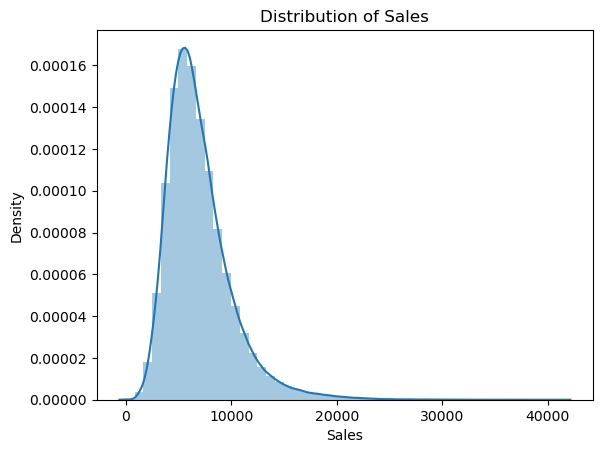

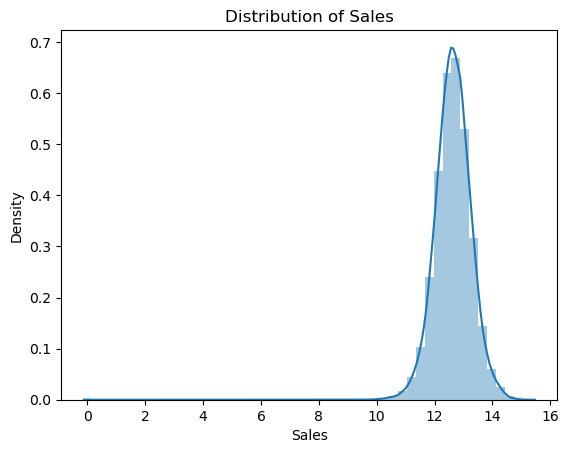

In [9]:
# Distribution of 'Sales'

# Before log transformation
sns.distplot(rossmann_df['Sales'])
plt.title('Distribution of Sales')
plt.show()
# After log transformation
sns.distplot(np.log2(rossmann_df['Sales']+1))
plt.title('Distribution of Sales')
plt.show()

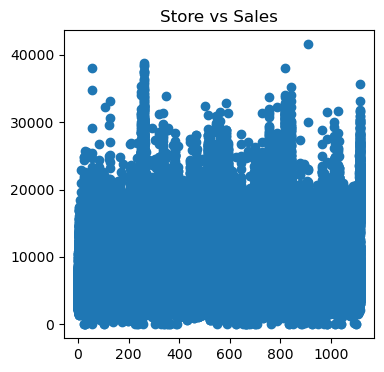

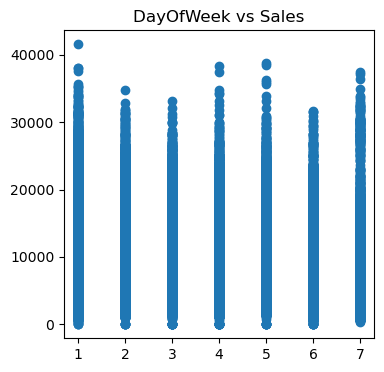

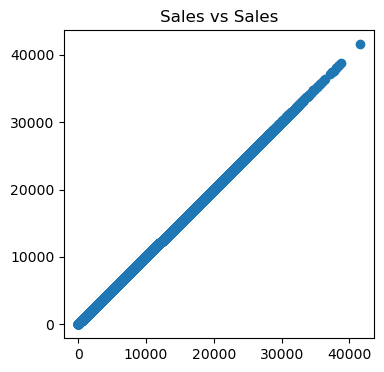

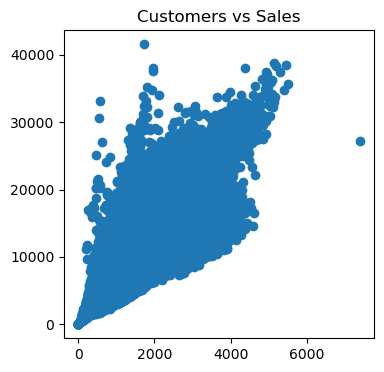

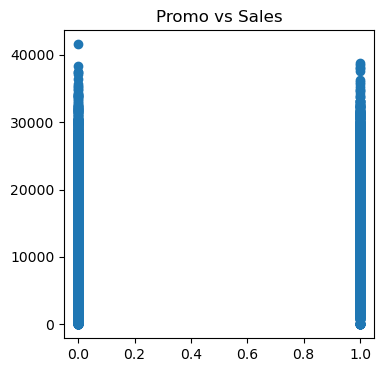

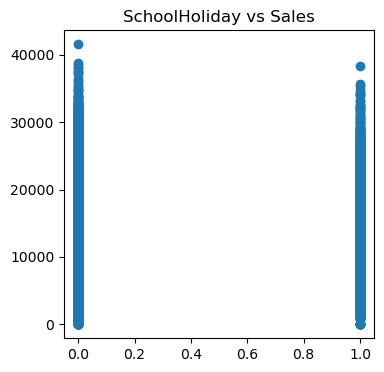

In [10]:
# Scatter plots Sales vs All Numerical columns
plt.rcParams['figure.figsize'] = (4,4)
for col in rossmann_df.describe().columns:
    
    plt.scatter(rossmann_df[col],rossmann_df['Sales'])
    plt.title(col+' vs Sales')
    plt.show()

<AxesSubplot:xlabel='DayOfWeek'>

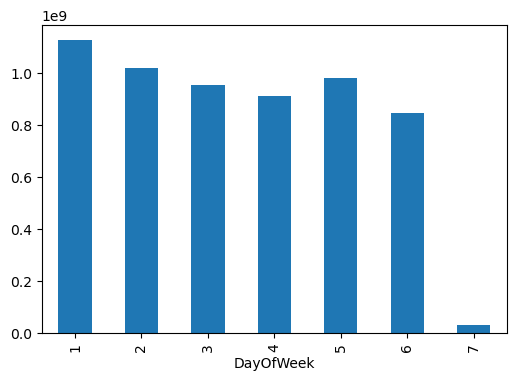

In [11]:
# Sales in different Days
plt.rcParams['figure.figsize'] = (6,4)
rossmann_df.groupby(['DayOfWeek'])['Sales'].sum().plot.bar()

Text(0, 0.5, 'Sales')

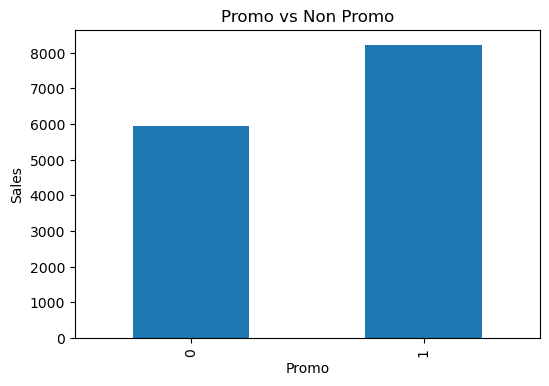

In [12]:
# Sales comparison for promotional and non promotional
rossmann_df.groupby(['Promo'])['Sales'].mean().plot.bar()
plt.title('Promo vs Non Promo')
plt.xlabel('Promo')
plt.ylabel('Sales')

In [13]:
# Econding StateHoliday
# '0'>0>a>b>c
print(f"Different catagories for StateHoliday : {rossmann_df.groupby(['StateHoliday'])['Sales'].mean()}")

# function for encoding the column 'StateHoliday'
def State_holiday_encoder(col):
    if col == 'c':
        return 1
    elif col == 'b':
        return 2
    elif col == 'a':
        return 3
    elif col == '0':
        return 4
    elif col == 0:
        return 5
    else:
        print('invalid')
        
# applying the  above function
rossmann_df['Holiday'] = rossmann_df['StateHoliday'].apply(State_holiday_encoder)
# dropping the column 'StateHoliday'
rossmann_df.drop(columns=['StateHoliday'], inplace= True)

Different catagories for StateHoliday : StateHoliday
0    6701.492117
0    6992.158856
a    8487.471182
b    9887.889655
c    9743.746479
Name: Sales, dtype: float64


In [14]:
# from str to date time conversion
from datetime import datetime
rossmann_df['Date'] = rossmann_df['Date'].apply(lambda col: datetime.strptime(col,'%Y-%m-%d'))

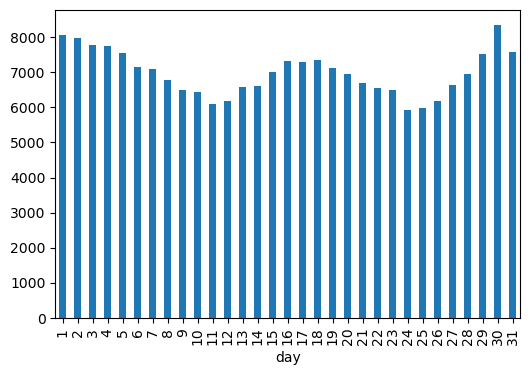

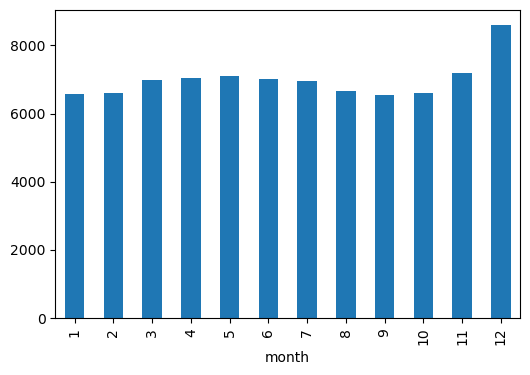

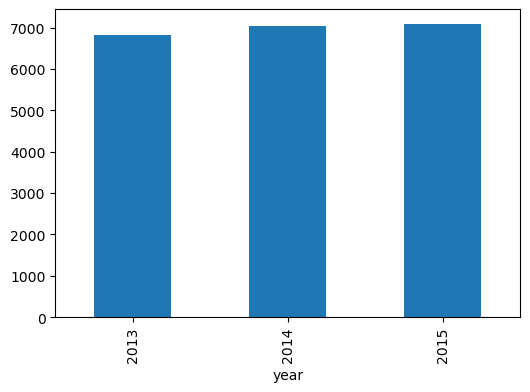

In [15]:
# creating day, month, year columns
rossmann_df['day'] = rossmann_df['Date'].apply(lambda d: d.day)
rossmann_df['month'] = rossmann_df['Date'].apply(lambda m: m.month)
rossmann_df['year'] = rossmann_df['Date'].apply(lambda y: y.year)

# looking for the patter in a specific day, month, year
rossmann_df.groupby(['day'])['Sales'].mean().plot.bar()
plt.show()
rossmann_df.groupby(['month'])['Sales'].mean().plot.bar()
plt.show()
rossmann_df.groupby(['year'])['Sales'].mean().plot.bar()
plt.show()

In [16]:
# there is not a specific spattern in day, months, year therefore dropping the newly created columns
rossmann_df.drop(columns=['day','month','year'], inplace= True)
# I think there is no use for date column therefore dropping it
# rossmann_df.drop(columns=['Date'], inplace= True)